<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em></center>
    
# Portfolio Optimierung

“Modern Portfolio Theory" (MPT), eine Hypothese, die von Harry Markowitz in seinem Paper "Portfolio Selection" (1952 im Journal of Finance veröffentlicht) vorgestellt wurde, ist eine Investitionstheorie, die auf der Idee basiert, dass risikoscheue Investoren Portfolios erstellen können, um ihre erwartete Rendite auf Basis eines gegebenen Marktrisikolevels optimieren oder maximieren können, wobei betont wird, dass Risiko ein inhärenter Teil einer höheren Belohnung ist. Sie ist eine der wichtigsten und einflussreichsten ökonomischen Theorien, die sich mit Finanzen und Investition beschäftigen.

## Monte Carlo Simulation für Optimierungssuche (Optimization Search)


Wir könnten wahllos versuchen, die optimale Portfoliobalance mithilfe der Monte Carlo Simulation zu finden.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download and get Daily Returns
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [3]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [4]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [5]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [6]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


# Tausende mögliche Allokationen simulieren

In [7]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


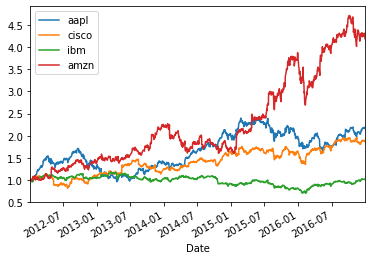

In [8]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [9]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


## Log Returns vs Arithmetische Returns

Wir werden jetzt dazu übergehen, logarithmische Renditen (log returns) anstelle von arithmetischen zu verwenden. Für die meisten unserer Fälle sind sie fast identisch, aber die meisten technischen Analysen verlangen eine "Enttrendung"(detrending)/Normalisierung der Zeitreihe und logarithmische Renditen sind ein schöner Weg, um das zu erreichen.
Logarithmische Renditen sind für viele der Algorithmen, denen wir begegnen, bequem zu handhaben.

Für eine komplette Analyse, warum wir logarithmische Renditen verwenden, sieh dir [diesen sehr guten Artikel](https://quantivity.wordpress.com/2011/02/21/why-log-returns/) an.


In [10]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


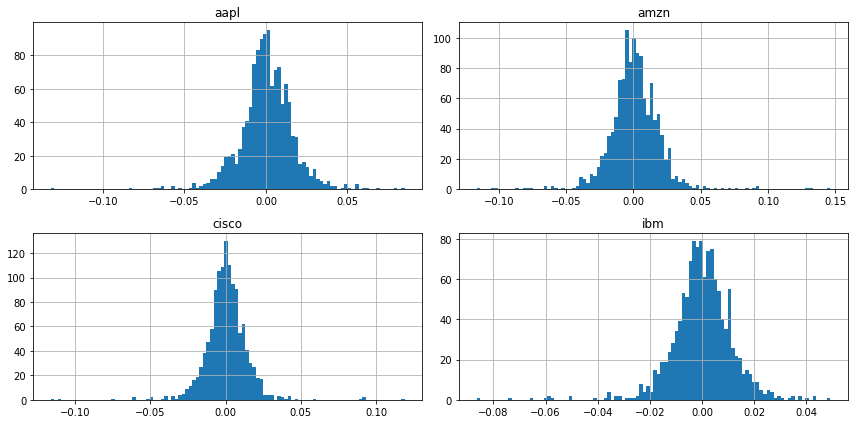

In [11]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [12]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,1257.0,0.000614,0.016466,-0.131875,-0.007358,0.000455,0.009724,0.085022
cisco,1257.0,0.000497,0.014279,-0.116091,-0.006240,0.000213,0.007634,0.118862
ibm,1257.0,0.000011,0.011819,-0.086419,-0.005873,0.000049,0.006477,0.049130
amzn,1257.0,0.001139,0.019362,-0.116503,-0.008534,0.000563,0.011407,0.146225


In [13]:
log_ret.mean() * 252

aapl     0.154803
cisco    0.125291
ibm      0.002788
amzn     0.287153
dtype: float64

In [14]:
log_ret.cov()

,aapl,cisco,ibm,amzn
aapl,0.000271,0.000071,0.000057,0.000075
cisco,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


In [15]:
log_ret.cov()*252 # mit Tagen multiplizieren

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


## Einzelner Durchlauf für zufällige Allokationen

In [16]:
# Seed bestimmen (optional)
np.random.seed(101)

# Aktienspalten
print('Stocks')
print(stocks.columns)
print('\n')

# Zufällige Gewichtungen erstellen
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Gewichtungen rebalancieren
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Erwartete Rendite
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Erwartete Volatilität
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Quotient
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.1559927204963252


Expected Volatility
0.1850264956590895


Sharpe Ratio
0.8430831483926556


Super! Jetzt können wir das einfach sehr oft durchlaufen lassen!

In [17]:

num_ports = 5000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Zufällige Gewichtungen erstellen
    weights = np.array(np.random.random(4))

    # Gewichtungen rebalancieren
    weights = weights / np.sum(weights)
    
    # Gewichtungen speichern
    all_weights[ind,:] = weights

    # Erwartete Rückgabe
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Erwartete Varianz
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Quotient
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [18]:
sharpe_arr.max()

1.030326055127131

In [19]:
sharpe_arr.argmax()

1419

In [20]:
all_weights[1419,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [21]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

## Die Daten grafisch darstellen

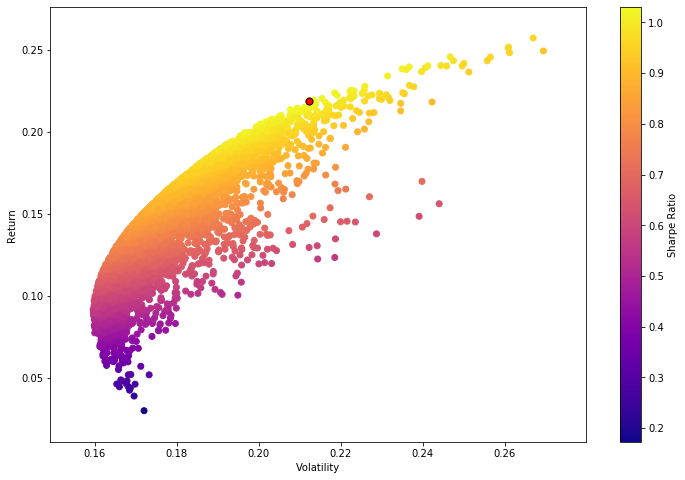

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

# Mathematische Optimierung

Es gibt sehr viel bessere Wege, um gute Allokationsgewichtungen zu finden, als bloß zu raten und dann zu überprüfen! Wir können  Optimierungsfunktionen verwenden, um die idealen Gewichtungen mathematisch zu bestimmen!

### Rendite- und SR-Operationen funktionalisieren

In [23]:
def get_ret_vol_sr(weights):
    """
    Liest Gewichtungen ein, gibt Array mit Rückgabewert, Volatilität und Sharpe Quotient zurück
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [24]:
from scipy.optimize import minimize

Um alle Parameter vollständig zu verstehen, siehe:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [25]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

Optimierung ist eine Minimierungsfunktion. Da wir den Sharpe Quotienten eigentlich maximieren wollen, müssen wir ihn ins Negative umkehren, damit wir den negativen Sharpe minimieren können (was dasselbe ist wie den positiven zu maximieren). 

In [26]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [27]:
# Einschränkungen/Constraints
def check_sum(weights):
    '''
    Gibt 0 zurück, falls die Summe der Gewichtungen 1.0 ist.
    '''
    return np.sum(weights) - 1

In [28]:
# Nach der Definition einer Minimierungsfunktion sollte diese 0 zurückgeben für die Bedingungen:
cons = ({'type':'eq','fun': check_sum})

In [29]:
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [30]:
init_guess = [0.25,0.25,0.25,0.25]

In [31]:
# Sequentielle Quadratsminimum (Least Squares) Programmierung(SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [32]:
opt_results

     fun: -1.0307168703356593
     jac: array([ 5.64157963e-05,  4.18424606e-05,  3.39921728e-01, -4.44948673e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.26628976, 0.20418983, 0.        , 0.52952041])

In [33]:
opt_results.x

array([0.26628976, 0.20418983, 0.        , 0.52952041])

In [34]:
get_ret_vol_sr(opt_results.x)

array([0.21885915, 0.21233683, 1.03071687])

# Alle Optimalen Portfolios (Efficient Frontier)

Die effiziente Grenze (efficient frontier) ist der Satz optimaler Portfolios, der den höchsten zu erwartenden Gewinn für ein gegebenes Risikolevel oder das niedrigste Risiko für ein gegebenes Level des erwarteten Renditeewertes bietet. Portfolios, die unter der effizienten Grenze liegen, sind suboptimal, da sie nicht genug Gewinn für ihr Risikolevel bieten. Porfolios, die sich rechts der effizienten Grenze befinden, sind ebenfalls suboptimal, da sie ein höheres Risikolevel für die gegebene Ertragsrate aufweisen.

Efficient Frontier http://www.investopedia.com/terms/e/efficientfrontier

In [35]:
frontier_y = np.linspace(0,0.3,100) # Ändere 100 in eine kleinere Zahl um, wenn Dein Computer langsam ist!

In [36]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [37]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

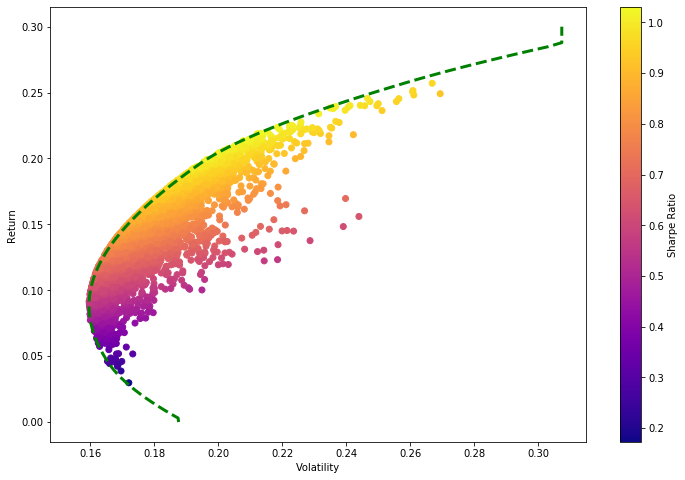

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Füge Grenzlinie hinzu
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

# Großartig!